<a href="https://colab.research.google.com/github/gbam-ds/FP-ML/blob/main/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Porto Seguro
##Getting data

see <a href="{https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/40222}">this discusion</a> about the data: 

In [1]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [2]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#!pip install pandas==1.2.2
import pandas as pd

In [6]:
pd.set_option('display.max_columns', None)

#train dataset
train_path = '/content/drive/MyDrive/porto-seguro-safe-driver-prediction/train.csv'
df_train = pd.read_csv(train_path)
df_train.head() 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [7]:
#O lançador do desafio nos informa que toda missing data da base está como -1

#Optamos por substituir -1 para NaN 
df_train = df_train.replace(-1,{})

#id não ajuda, vou dropar
df_train.drop(['id'], axis=1, inplace=True)

#ps_car_03_cat e ps_car_05_cat tem muito nan, vou dropar
df_train.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1, inplace = True)

#ps_reg_03 e ps_car_14 são continuas, vou preencher com média
df_train['ps_reg_03'].fillna((df_train['ps_reg_03'].mean()), inplace=True)
df_train['ps_car_14'].fillna((df_train['ps_car_14'].mean()), inplace=True)


#ps_car_07_cat, vou preencher com moda
df_train['ps_car_07_cat'] = df_train['ps_car_07_cat'].fillna(df_train['ps_car_07_cat'].mode()[0])


#Resampling

##

In [15]:
labels = df_train.columns[1:]

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Usando Cluster Centroid Resampler

In [ ]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 7)

X_cc_resampled, y_cc_resampled = cc.fit_resample(X_train,y_train)

#Counter(y_resampled)

Usando SMOTE resampler

In [ ]:
from imblearn.over_sampling import SMOTE
X_smt_resampled, y_smt,resampled = SMOTE(random_state=7).fit_resample(X_train,y_train)
#Counter(y_smt_resampled)

Hipótese 3: SMOTE + Cluster 

In [34]:
from imblearn.over_sampling import KMeansSMOTE as ks

X_ks_resampled, y_ks_resampled = ks.fit_resample(X_train, y_train)

#Counter(y_ks_resampled)

TypeError: ignored

In [35]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=7)
X_mix_resampled, y_mix_resampled = smote_enn.fit_resample(X_train, y_train)
#Counter(y_mix_resampled)

KeyboardInterrupt: ignored

#analisando correlações - Nominal-Continuous


In [ ]:
from scipy import stats
stats.pointbiserialr(df_train["target"], df_train["ps_reg_03"])


PointbiserialrResult(correlation=0.030888104833059753, pvalue=1.42135575143244e-125)

In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_14"])


PointbiserialrResult(correlation=-0.004474145702374508, pvalue=0.0005568340950494193)

In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_12"])


PointbiserialrResult(correlation=0.038789827661443774, pvalue=6.390537685699854e-197)

analisando correlações - Nominal-Ordinal


In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_13"])


PointbiserialrResult(correlation=0.05389877948477373, pvalue=0.0)

In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_15"])


PointbiserialrResult(correlation=0.027667281027271406, pvalue=3.954459667064273e-101)

In [ ]:
#rank biserial
#pip3 install rbcde
#import rbcde


analisando correlações - Nominal-Nominal

In [ ]:
#phi/matthews correlation
matthews_corrcoef(df_train["target"], df_train["ps_car_01_cat"])

-0.00021485071683691865

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_02_cat"])

-0.03154245565431533

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_04_cat"])

0.02192600176887172

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_06_cat"])

0.0004908438621801378

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(df_train["target"], df_train["ps_car_08_cat"])

-0.020341933485980727

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_09_cat"])

0.010374536771818198

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_10_cat"])

0.0009528096651092079

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_11_cat"])

8.759261797009748e-05

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_ind_02_cat"])

-0.003025576762370349

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_ind_04_cat"])

0.01018121148299699

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_ind_05_cat"])

0.020155648781156336

In [ ]:
#!pip install pandas-profiling

In [ ]:
#import pandas_profiling as pp
#prof = pp.ProfileReport(df_train)
#prof.to_file(output_file='output.html')

In [ ]:
#Verificando missing data
#missing = df_train.isnull().sum().sort_values(ascending=False)

#missing 

ps_car_03_cat     411231
ps_car_05_cat     266551
ps_reg_03         107772
ps_car_14          42620
ps_car_07_cat      11489
ps_ind_05_cat       5809
ps_car_09_cat        569
ps_ind_02_cat        216
ps_car_01_cat        107
ps_ind_04_cat         83
ps_car_11              5
ps_car_02_cat          5
ps_car_12              1
ps_calc_11             0
ps_calc_15_bin         0
ps_car_13              0
ps_calc_19_bin         0
ps_calc_18_bin         0
ps_car_15              0
ps_calc_01             0
ps_calc_17_bin         0
ps_calc_02             0
ps_calc_16_bin         0
ps_calc_14             0
ps_calc_10             0
ps_calc_13             0
ps_calc_03             0
ps_calc_04             0
ps_calc_05             0
ps_calc_06             0
ps_calc_12             0
ps_calc_08             0
ps_calc_09             0
ps_calc_07             0
id                     0
ps_car_11_cat          0
ps_car_10_cat          0
ps_ind_01              0
ps_ind_03              0
ps_ind_06_bin          0


In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = 100*(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ps_car_03_cat,411231,69.089837
ps_car_05_cat,266551,44.782531
ps_reg_03,107772,18.106490
ps_car_14,42620,7.160474
ps_car_07_cat,11489,1.930237
ps_ind_05_cat,5809,0.975955
ps_car_09_cat,569,0.095596
ps_ind_02_cat,216,0.036290
ps_car_01_cat,107,0.017977
ps_ind_04_cat,83,0.013945


Tem muito mais 0 do que 1, implicando em poucos casos de acionamento de seguro.
Discussão a respeito dos critérios da ponderação deve ser feita.

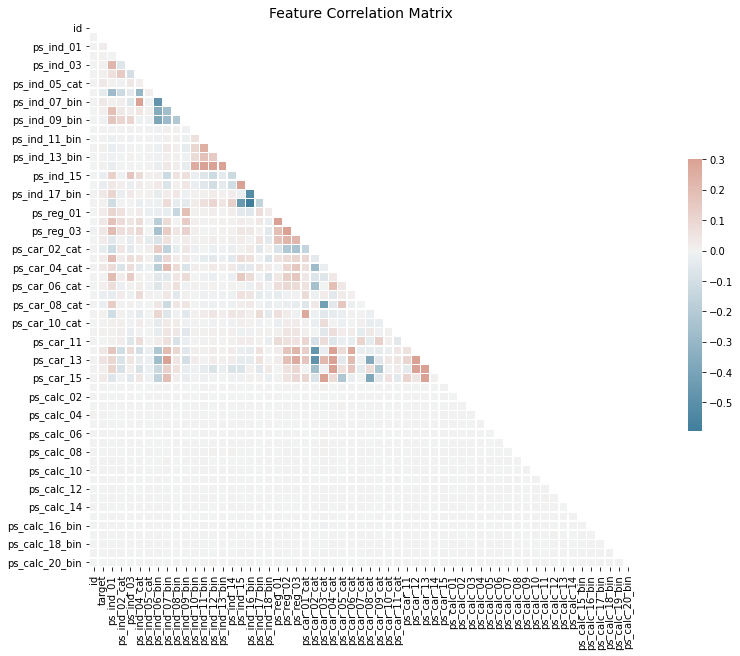

In [ ]:
# antes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train.corr()

fig, ax = plt.subplots(figsize=(20,10))   

cmap = sns.diverging_palette(230, 20, n= 7, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

### não temos 'target' no eixo y -_-

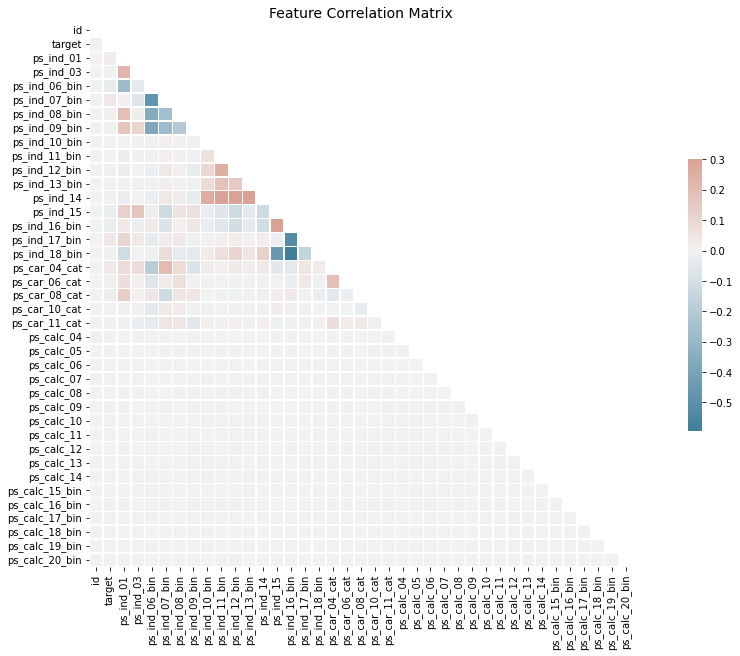

In [ ]:
ints = df_train.select_dtypes(include = 'int64')

#Medir a correlação nos "ints"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

intscorr = ints.corr()

fig, ax = plt.subplots(figsize=(20,10))   

cmap = sns.diverging_palette(230, 20, n= 7, as_cmap=True)

mask = np.triu(np.ones_like(intscorr, dtype=bool))

sns.heatmap(intscorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()



In [ ]:
floats = df_train.select_dtypes(include = 'float64')


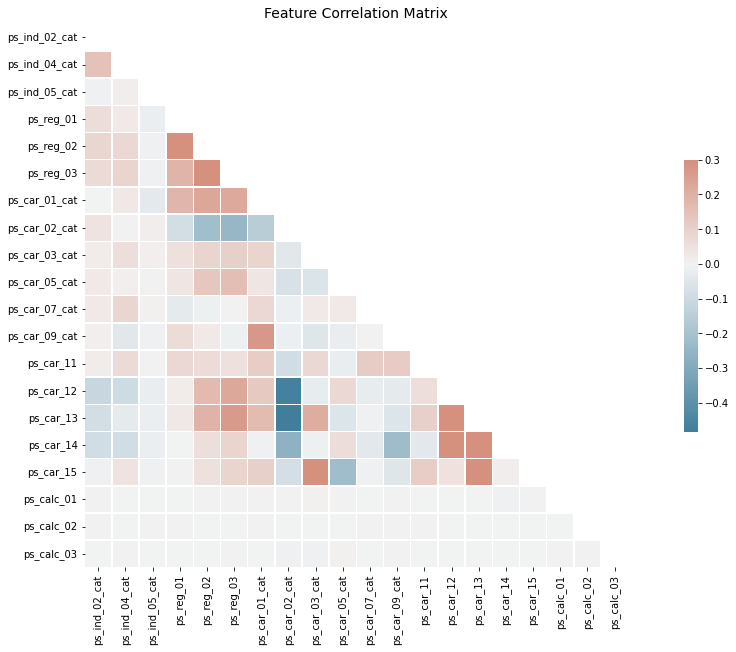

In [ ]:
#Medir a correlação dos floats

floatscorr = floats.corr()

fig, ax = plt.subplots(figsize=(20,10))   

cmap = sns.diverging_palette(230, 20, n= 7, as_cmap=True)

mask = np.triu(np.ones_like(floatscorr, dtype=bool))

sns.heatmap(floatscorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()



(0.0, 573520.0)

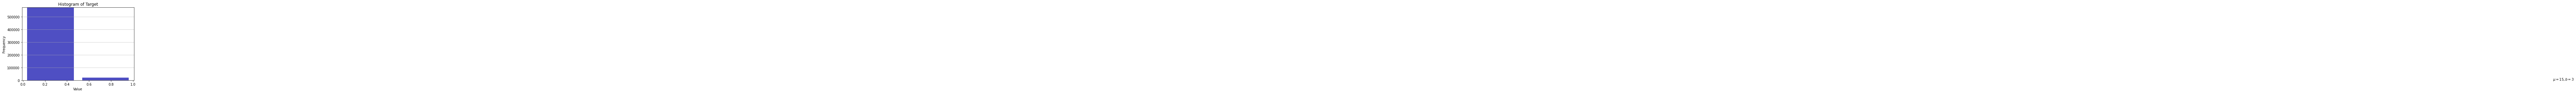

In [ ]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df_train['target'], bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Target')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

numeric_data.shape
categorical_data.shape

(595212, 0)

Por que não usamos o Tomak? 

- Como o tomak exclui outliers não é do nosso interesse aplicá-lo já que os nossos targets são outliers. 

In [ ]:
#No caso, não funcionou pois nossa amostra ultrapassa o limite de 10000 amostras (temos mais de 500.000) 

Etapas seguintes: 

1. Feature Engineering
*  Google Sheets


2. Método de resampling para Y

*   Undersampling: Cluster 
*   Oversampling: SMOTE
*   Mix: SMOTE + Cluster 


3. modeling

4. testing accuracy/error

*   accuracy_score
*   confusion matrix

Analisar a coluna (ver) + testar se tem missing + ver o nível de correlação (se tiver muitas NAN e baixo nível de correlação com a target = dropar )



In [ ]:
df_train["ps_ind_05_cat"].hist()

In [ ]:
corrmat = df_train.corr()

In [ ]:
#target correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

NameError: ignored

In [ ]:
corr_ps_car_07_cat = df_train['ps_car_09_cat'].corr(df_train['target'])

In [ ]:
corr_ps_ind_02_cat = df_train['ps_ind_02_cat'].corr(df_train['target'])